Import libraries

In [2]:
import tensorflow as tf
import os
import librosa
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Set physical device to GPU

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import tensorflow as tf

model_path = '/Users/karanhadiyal/desktop/esc/model.h5'
model = tf.keras.models.load_model(model_path)

Metal device set to: Apple M1


Function to read wav file and return in form of numpy array

In [5]:
def read_wav(writeFile):
    data_sample_average = 220500 
    data, samplerate = librosa.load(writeFile, sr=None)
    
    # structura de decizie cu scopul de a avea acelasi data sample in cadrul tuturor semnalelor
    if data.shape[0] <= data_sample_average:
        newdata = np.zeros((data_sample_average,))
        newdata[: data.shape[0]] = data
    else:
        newdata = data[:data_sample_average]
    # print(data.shape)
    dataN = np.shape(newdata)[0]
    # print(N)
    newdata = np.reshape(np.transpose(newdata),(1, dataN))
    # print(np.transpose(data).shape)
    return newdata

Function to get spectrum from respective read_wav attribute

In [6]:
def get_spectrum(signal, w, flag, channels):

    signal = signal.astype('float32')  
    Nsamples = np.size(signal, 1)
    delmax = w / 4  # Maximum delay should be w / 4
    res = np.where(channels <= delmax)
    channels = channels[res]  #remove channels not satisfyiong this condition. 
    m = np.shape(channels)[0]
    

    spectrograms = Nsamples // w # Number of spectrograms
    Samples = spectrograms * w # The number of samples used to compute the spectrograms
    matrix = np.reshape(signal[0, 0 : Samples], (spectrograms, w)) # Each line is one to be submited for computation of spectrogram 
    
    spectrum = np.zeros((m, spectrograms)) # Spectrum initialization
    for i in range(0, spectrograms):
        values = matrix[i, :] # The whole line 
        for k in range(0, m):
            delay = channels[k]  # Delay  
            t = np.array(range(delay, w-delay-1))
            difus = np.abs(values[t - delay] + values[t + delay] - 2 * values[t])
            
            if flag == 0:
                spectrum[k, i] = np.mean(difus) / 4
            elif flag == 1:
                spectrum[k, i] = np.mean(difus / (np.abs(values[t - delay]) + np.abs(values[t + delay]) + 2 * np.abs(values[t]) + 1e-12)) / 4
    return spectrum

Read csv

In [16]:
csv_path = '/Users/karanhadiyal/desktop/esc/labels.csv'
labels = pd.read_csv(csv_path)

Read wav file

In [9]:
wav_path = "/Users/karanhadiyal/desktop/esc/archive/audio/audio/4-177250-A-10.wav"

In [10]:
from playsound import playsound
playsound(wav_path)

In [11]:
signal = read_wav(wav_path)
channels = np.array([2, 4, 8, 16, 20, 32, 50, 64, 100, 128, 200, 300])
w = 1000
flag = 0

In [12]:
predict = get_spectrum(signal=signal, w=w, flag=flag, channels=channels)

Spectrum of wav file

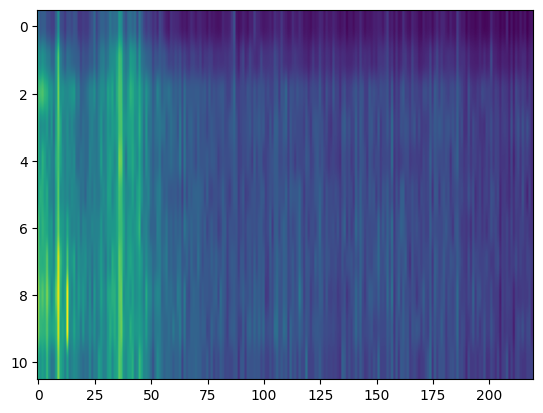

In [13]:
plt.imshow(predict, aspect='auto')

Prediction of model

In [17]:
s = np.shape(predict)
z = np.argmax(model.predict(np.reshape(predict,(1, s[0], s[1],1))))
print(labels["label"][z])

1/1 [==============================] - 0s 29ms/step
rain
